In [58]:
# Import additional libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.cluster.hierarchy as sch
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
# import umap

In [59]:
# Load and explore data
data = pd.read_csv(r'C:\Users\Mohamed Makki\Desktop\Projects\Machine_Learning-Projects\Project_2\Datasets\segmentation data.csv')

# Display basic information
print("Dataset Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())
print("\nDuplicate Rows:", data.duplicated().sum())

Dataset Shape: (2000, 8)

Data Types:
 ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

Missing Values:
 ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

Duplicate Rows: 0


# Segmentation data - Legend
* The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. 

### Sex
* 0 male   
* 1 female
### Marital Status
* 0 single   
* 1 non-single (divorced / separated / married / widowed)
### Education
* 0 other / unknown   
* 1 high school   
* 2 university   
* 3 graduate school
### Occupation
* 0 unemployed / unskilled   
* 1 skilled employee / official   
* 2 management / self-employed / highly qualified employee / officer
### Settlement size
* 0 small city   
* 1 mid-sized city   
* 2 big city

In [60]:
# Generate more comprehensive statistics
print("\nDetailed Statistics:")
print(data.describe())


Detailed Statistics:
                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.25000

In [61]:
# Check for class imbalance in categorical variables
categorical_cols = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(data[col].value_counts())
    print(f"Proportions for {col}:")
    print(data[col].value_counts(normalize=True))


Value counts for Sex:
Sex
0    1086
1     914
Name: count, dtype: int64
Proportions for Sex:
Sex
0    0.543
1    0.457
Name: proportion, dtype: float64

Value counts for Marital status:
Marital status
0    1007
1     993
Name: count, dtype: int64
Proportions for Marital status:
Marital status
0    0.5035
1    0.4965
Name: proportion, dtype: float64

Value counts for Education:
Education
1    1386
2     291
0     287
3      36
Name: count, dtype: int64
Proportions for Education:
Education
1    0.6930
2    0.1455
0    0.1435
3    0.0180
Name: proportion, dtype: float64

Value counts for Occupation:
Occupation
1    1113
0     633
2     254
Name: count, dtype: int64
Proportions for Occupation:
Occupation
1    0.5565
0    0.3165
2    0.1270
Name: proportion, dtype: float64

Value counts for Settlement size:
Settlement size
0    989
1    544
2    467
Name: count, dtype: int64
Proportions for Settlement size:
Settlement size
0    0.4945
1    0.2720
2    0.2335
Name: proportion, dtype: float6

In [62]:
# Enhanced correlation analysis
corr_matrix = data.corr()

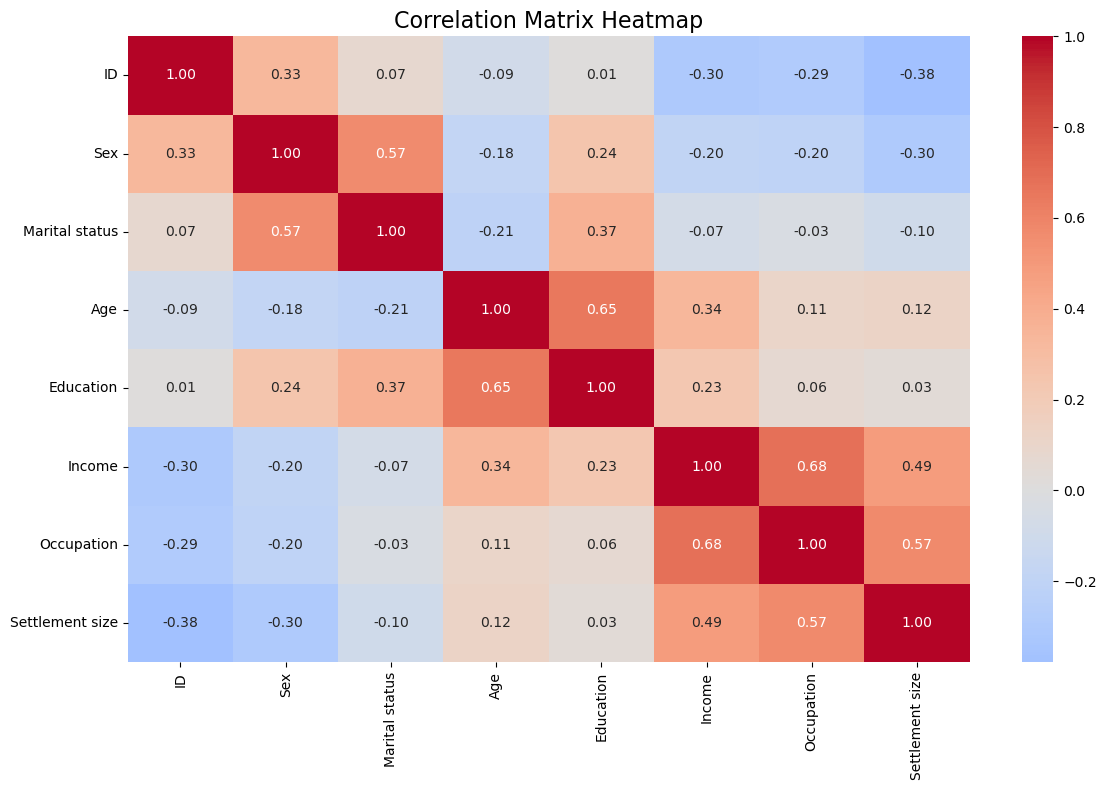

In [63]:
# Create a heatmap with values
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

### Observations:
* Strong correlation of 0.65 between Age and Education
* Strong correlation of 0.68 between Occupation and Income
* Good correlation of 0.57 between Settlement size and Occupation
* Good correlation of 0.57 between Sex and Marital status

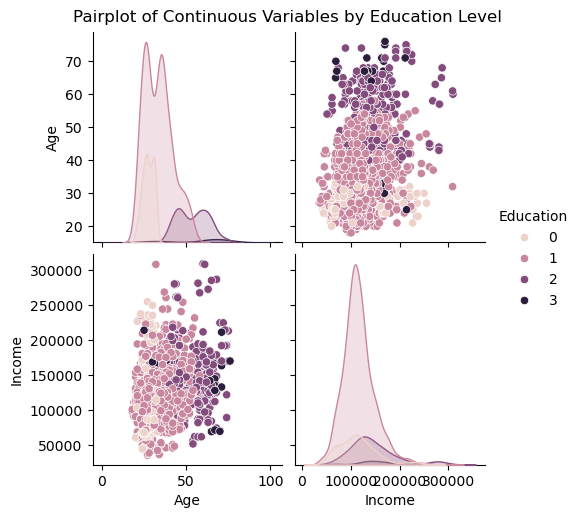

In [64]:
# Create a pairplot for continuous variables
continuous_vars = ['Age', 'Income']
sns.pairplot(data[continuous_vars + ['Education']], hue='Education', diag_kind='kde')
plt.suptitle('Pairplot of Continuous Variables by Education Level', y=1.02)
plt.show()

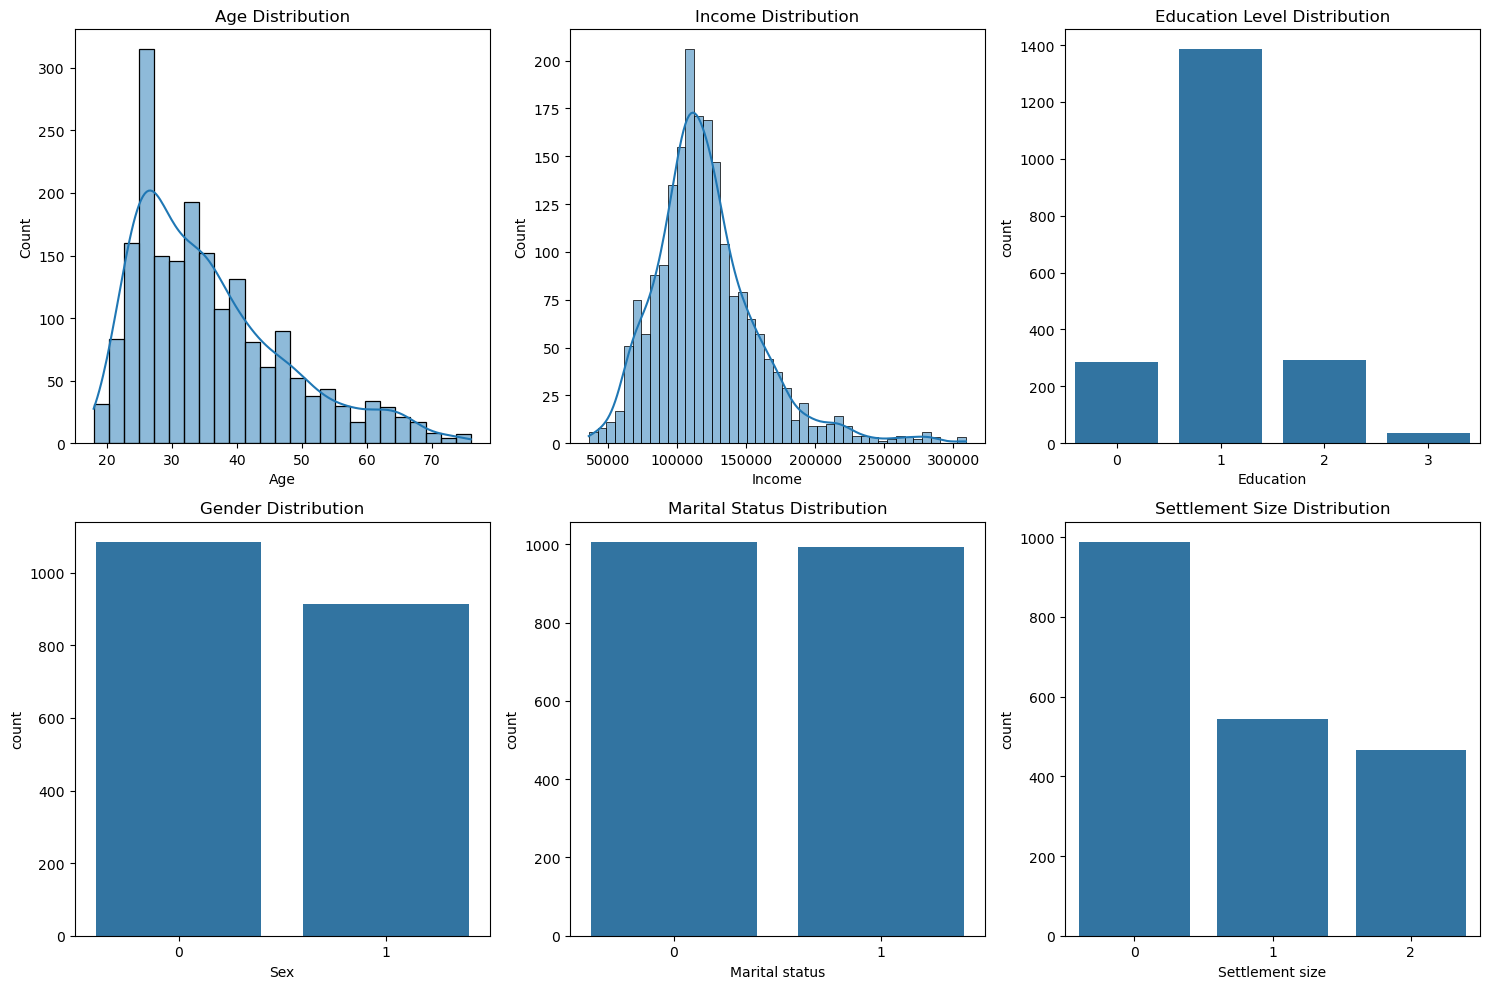

In [65]:
# Distribution analysis with enhanced visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Age distribution
sns.histplot(data['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Income distribution
sns.histplot(data['Income'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Income Distribution')

# Education distribution
sns.countplot(x='Education', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Education Level Distribution')

# Sex distribution
sns.countplot(x='Sex', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')

# Marital status distribution
sns.countplot(x='Marital status', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Marital Status Distribution')

# Settlement size distribution
sns.countplot(x='Settlement size', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Settlement Size Distribution')

plt.tight_layout()
plt.show()

### Observations:

#### For continuous variables:

* Average Age = 35.90 years
* Average Income = 120.95K
* Sex - Proportion of females in the dataset is 45.70%
* Marital Status - Proportion of non-singles in the dataset is 49.65%

In [66]:
# Prepare data for clustering
# Drop ID column as it's not useful for clustering
X = data.drop('ID', axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
# Determine optimal number of clusters using multiple methods
# Elbow method
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Silhouette score
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

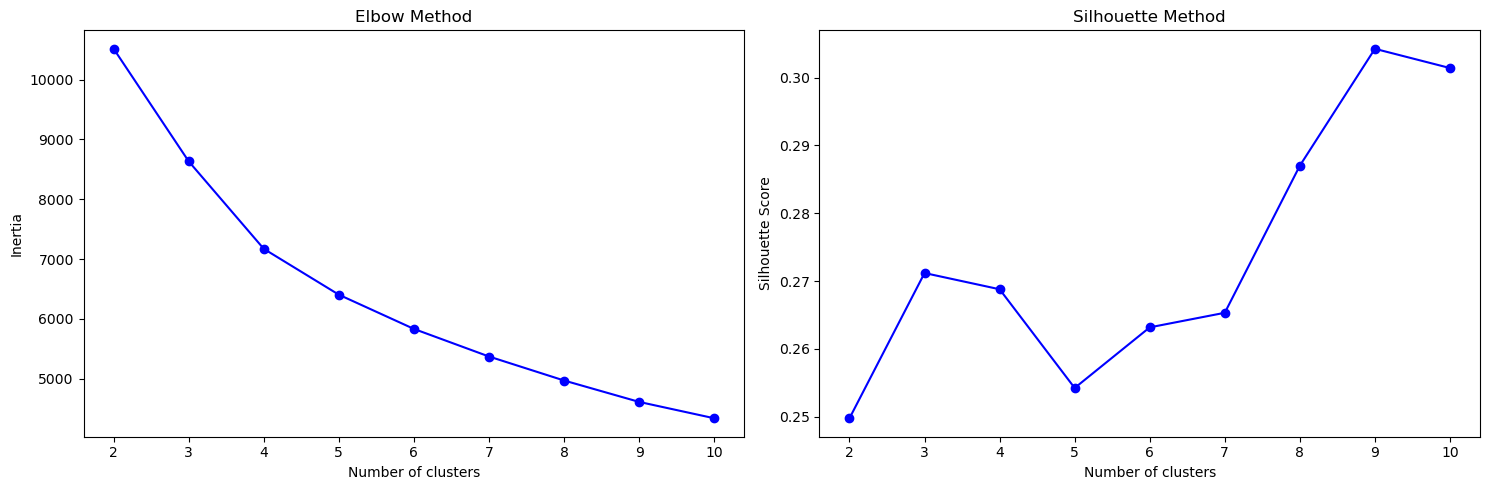

In [68]:
# Plot elbow and silhouette methods
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_range, inertia, 'bo-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')

ax2.plot(k_range, silhouette_scores, 'bo-')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Method')

plt.tight_layout()
plt.show()

In [69]:
# Apply multiple clustering algorithms
optimal_clusters = 4  # Based on elbow and silhouette analysis

# KMeans clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
agg_labels = agg_clustering.fit_predict(X_scaled)

# Evaluate clustering performance
clustering_algorithms = {
    'KMeans': kmeans_labels,
    'Gaussian Mixture': gmm_labels,
    'Agglomerative': agg_labels
}

for name, labels in clustering_algorithms.items():
    silhouette = silhouette_score(X_scaled, labels)
    calinski = calinski_harabasz_score(X_scaled, labels)
    davies = davies_bouldin_score(X_scaled, labels)
    print(f"{name} - Silhouette: {silhouette:.3f}, Calinski-Harabasz: {calinski:.3f}, Davies-Bouldin: {davies:.3f}")

KMeans - Silhouette: 0.269, Calinski-Harabasz: 633.807, Davies-Bouldin: 1.331
Gaussian Mixture - Silhouette: 0.198, Calinski-Harabasz: 348.626, Davies-Bouldin: 1.690
Agglomerative - Silhouette: 0.251, Calinski-Harabasz: 591.656, Davies-Bouldin: 1.341


In [70]:
# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# umap_reducer = umap.UMAP(random_state=42)
# X_umap = umap_reducer.fit_transform(X_scaled)

# Create subplots for different dimensionality reduction techniques
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('PCA', 't-SNE', 'UMAP', '3D PCA'),
    specs=[[{"type": "xy"}, {"type": "xy"}],
           [{"type": "xy"}, {"type": "scene"}]]
)

In [87]:
# Add PCA scatter plot
fig.add_trace(
    go.Scatter(
        x=X_pca[:, 0], y=X_pca[:, 1],
        mode='markers',
        marker=dict(color=kmeans_labels, colorscale='Viridis', showscale=False),
        name='PCA'
    ),
    row=1, col=1
)

# Add t-SNE scatter plot
fig.add_trace(
    go.Scatter(
        x=X_tsne[:, 0], y=X_tsne[:, 1],
        mode='markers',
        marker=dict(color=kmeans_labels, colorscale='Plasma', showscale=False),
        name='t-SNE'
    ),
    row=1, col=2
)

# Add UMAP scatter plot (Disabled - written as comment only)
# fig.add_trace(
#     go.Scatter(
#         x=X_umap[:, 0], y=X_umap[:, 1],
#         mode='markers',
#         marker=dict(color=kmeans_labels, colorscale='Rainbow', showscale=False),
#         name='UMAP'
#     ),
#     row=2, col=1
# )



fig.add_trace(
    go.Scatter3d(
        x=X_pca_3d[:, 0], y=X_pca_3d[:, 1], z=X_pca_3d[:, 2],
        mode='markers',
        marker=dict(size=5, color=kmeans_labels, colorscale='Viridis', opacity=0.8),
        name='3D PCA'
    ),
    row=2, col=2
)

fig.update_layout(height=800, width=1000, title_text="Customer Segmentation Visualizations")
fig.show()

Cluster Sizes:
Cluster
0    705
1    570
2    462
3    263
Name: count, dtype: int64


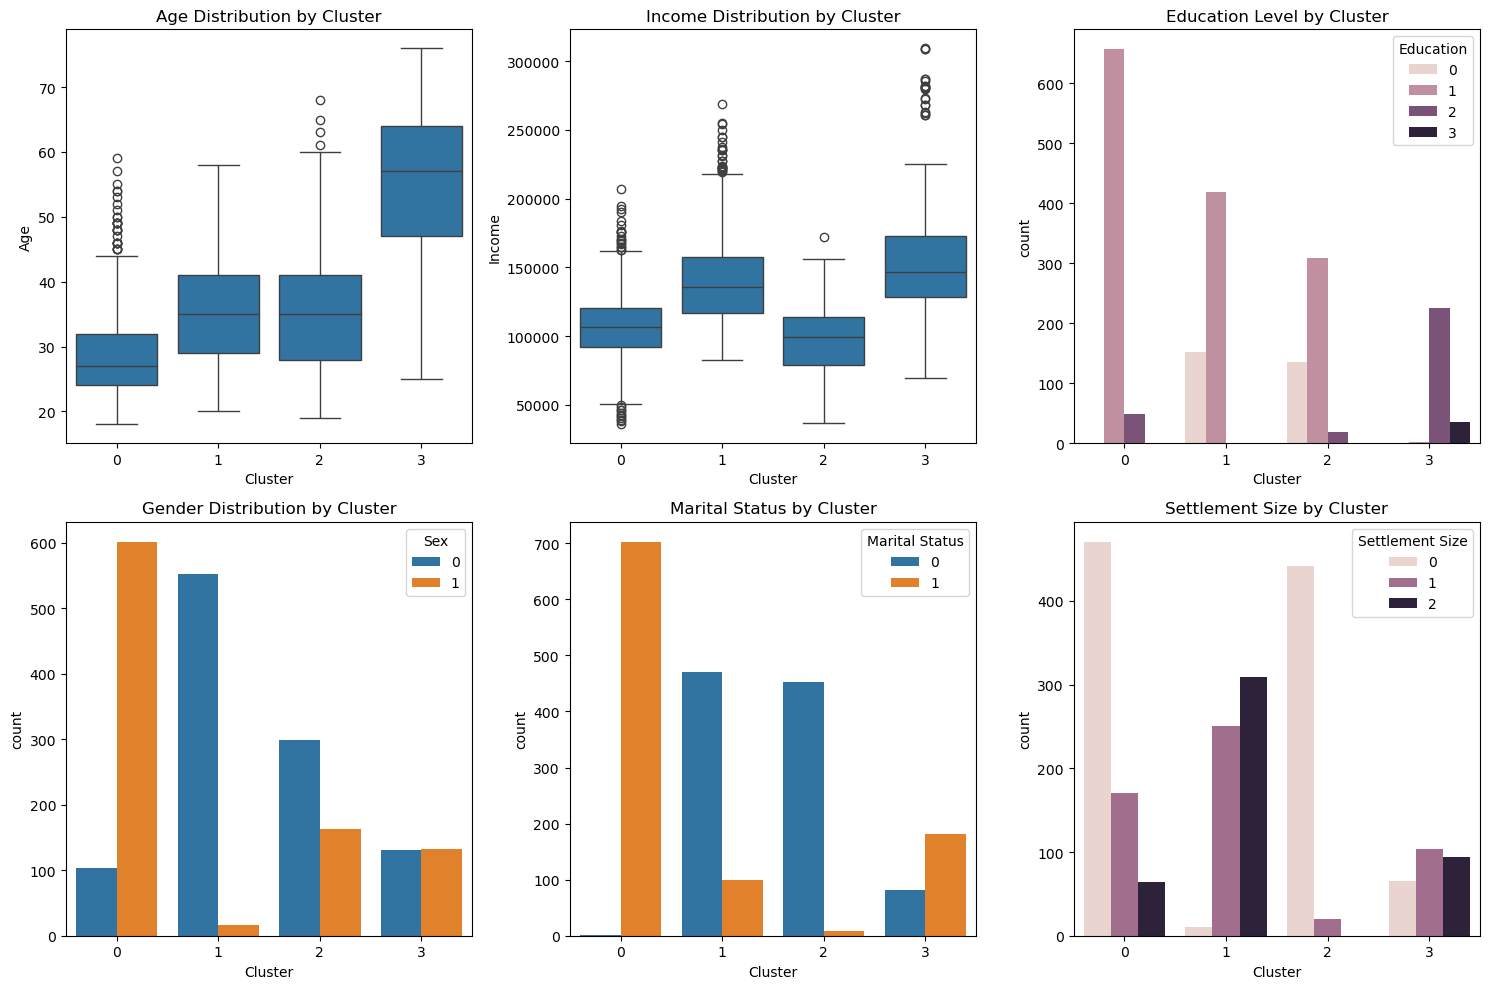

In [72]:
# Analyze cluster characteristics
data['Cluster'] = kmeans_labels

# Cluster sizes
cluster_sizes = data['Cluster'].value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes)

# Analyze feature distributions across clusters
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Age by cluster
sns.boxplot(x='Cluster', y='Age', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution by Cluster')

# Income by cluster
sns.boxplot(x='Cluster', y='Income', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Income Distribution by Cluster')

# Education by cluster
sns.countplot(x='Cluster', hue='Education', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Education Level by Cluster')
axes[0, 2].legend(title='Education', loc='upper right')

# Sex by cluster
sns.countplot(x='Cluster', hue='Sex', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution by Cluster')
axes[1, 0].legend(title='Sex', loc='upper right')

# Marital status by cluster
sns.countplot(x='Cluster', hue='Marital status', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Marital Status by Cluster')
axes[1, 1].legend(title='Marital Status', loc='upper right')

# Settlement size by cluster
sns.countplot(x='Cluster', hue='Settlement size', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Settlement Size by Cluster')
axes[1, 2].legend(title='Settlement Size', loc='upper right')

plt.tight_layout()
plt.show()

Cluster Centers (Original Scale):
        Sex  Marital status        Age  Education         Income  Occupation  \
0  0.853901        0.997163  28.963121   1.068085  105759.119149    0.634043   
1  0.029825        0.173684  35.635088   0.733333  141218.249123    1.271930   
2  0.352814        0.019481  35.577922   0.746753   97859.852814    0.329004   
3  0.501901        0.692015  55.703422   2.129278  158338.422053    1.129278   

   Settlement size  
0         0.422695  
1         1.522807  
2         0.043290  
3         1.110266  

Feature Importance by Cluster (% deviation from overall mean):
                  Cluster_0   Cluster_1  Cluster_2   Cluster_3
Sex               86.849171   93.473838  22.797844    9.825195
Marital status   100.838494   65.018286  96.076431   39.378693
Age               19.343004    0.762796   0.921991   55.123847
Education          2.898372   29.351317  28.058454  105.132714
Income            12.562832   16.753278  19.093611   30.907513
Occupation        

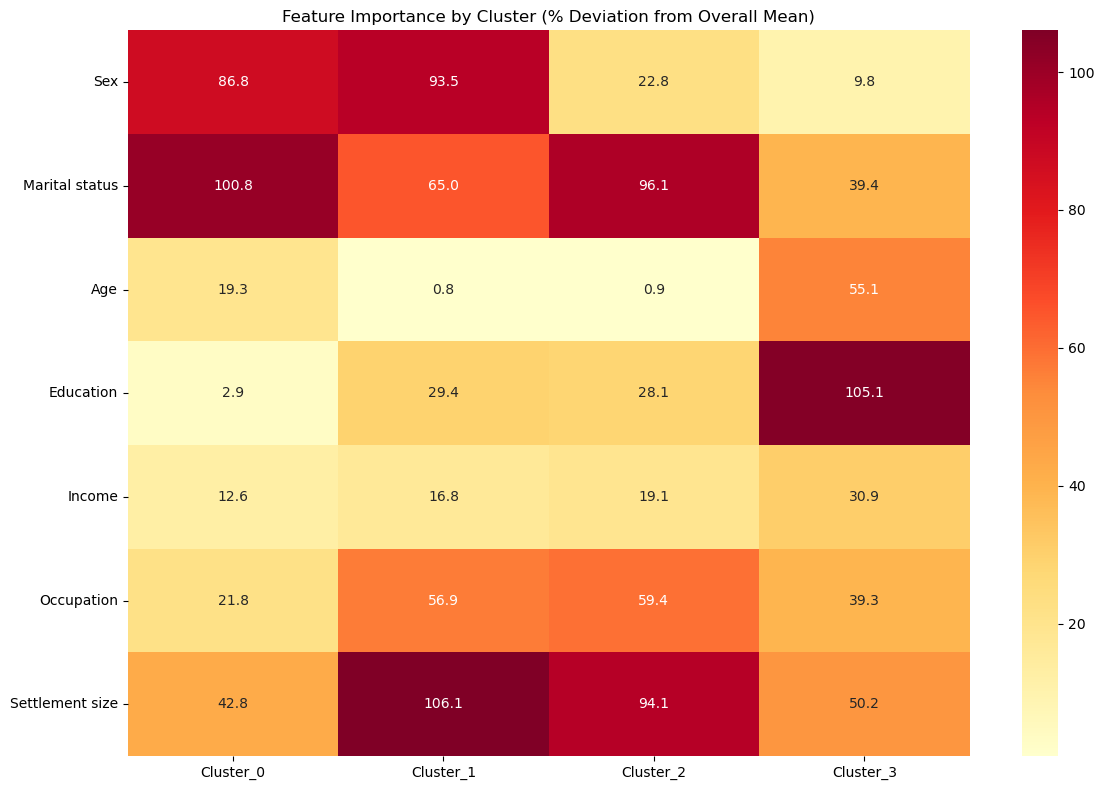

In [73]:
# Calculate cluster centroids and analyze feature importance
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print("Cluster Centers (Original Scale):")
print(cluster_centers_df)

# Calculate feature importance for each cluster
feature_importance = {}
for i in range(optimal_clusters):
    feature_importance[f'Cluster_{i}'] = {}
    for j, feature in enumerate(X.columns):
        # Calculate how much this feature deviates from the overall mean
        overall_mean = X[feature].mean()
        cluster_mean = cluster_centers_df.loc[i, feature]
        feature_importance[f'Cluster_{i}'][feature] = abs(cluster_mean - overall_mean) / overall_mean * 100

# Convert to DataFrame for easier analysis
importance_df = pd.DataFrame(feature_importance)
print("\nFeature Importance by Cluster (% deviation from overall mean):")
print(importance_df)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.heatmap(importance_df, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Feature Importance by Cluster (% Deviation from Overall Mean)')
plt.tight_layout()
plt.show()

In [74]:
# Create customer profiles for each cluster
profiles = {}

for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    profile = {
        'Size': len(cluster_data),
        'Avg Age': cluster_data['Age'].mean(),
        'Avg Income': cluster_data['Income'].mean(),
        'Gender Distribution': {
            'Male': len(cluster_data[cluster_data['Sex'] == 0]),
            'Female': len(cluster_data[cluster_data['Sex'] == 1])
        },
        'Marital Status Distribution': {
            'Single': len(cluster_data[cluster_data['Marital status'] == 0]),
            'Non-Single': len(cluster_data[cluster_data['Marital status'] == 1])
        },
        'Education Distribution': cluster_data['Education'].value_counts().to_dict(),
        'Occupation Distribution': cluster_data['Occupation'].value_counts().to_dict(),
        'Settlement Size Distribution': cluster_data['Settlement size'].value_counts().to_dict()
    }
    profiles[f'Cluster_{cluster}'] = profile

In [75]:
# Print customer profiles
for cluster, profile in profiles.items():
    print(f"\n{'-'*50}")
    print(f"{cluster} Profile:")
    print(f"{'-'*50}")
    print(f"Size: {profile['Size']} customers ({profile['Size']/len(data)*100:.1f}%)")
    print(f"Average Age: {profile['Avg Age']:.1f} years")
    print(f"Average Income: ${profile['Avg Income']:,.0f}")
    print(f"Gender: {profile['Gender Distribution']['Male']} Male, {profile['Gender Distribution']['Female']} Female")
    print(f"Marital Status: {profile['Marital Status Distribution']['Single']} Single, {profile['Marital Status Distribution']['Non-Single']} Non-Single")
    
    # Find dominant education level
    dominant_edu = max(profile['Education Distribution'].items(), key=lambda x: x[1])
    edu_mapping = {0: 'Other/Unknown', 1: 'High School', 2: 'University', 3: 'Graduate School'}
    print(f"Dominant Education: {edu_mapping[dominant_edu[0]]} ({dominant_edu[1]} customers)")
    
    # Find dominant occupation
    dominant_occ = max(profile['Occupation Distribution'].items(), key=lambda x: x[1])
    occ_mapping = {0: 'Unemployed/Unskilled', 1: 'Skilled Employee', 2: 'Management/Self-Employed'}
    print(f"Dominant Occupation: {occ_mapping[dominant_occ[0]]} ({dominant_occ[1]} customers)")
    
    # Find dominant settlement size
    dominant_settlement = max(profile['Settlement Size Distribution'].items(), key=lambda x: x[1])
    settlement_mapping = {0: 'Small City', 1: 'Mid-Sized City', 2: 'Big City'}
    print(f"Dominant Settlement: {settlement_mapping[dominant_settlement[0]]} ({dominant_settlement[1]} customers)")


--------------------------------------------------
Cluster_0 Profile:
--------------------------------------------------
Size: 705 customers (35.2%)
Average Age: 29.0 years
Average Income: $105,759
Gender: 103 Male, 602 Female
Marital Status: 2 Single, 703 Non-Single
Dominant Education: High School (657 customers)
Dominant Occupation: Skilled Employee (421 customers)
Dominant Settlement: Small City (471 customers)

--------------------------------------------------
Cluster_1 Profile:
--------------------------------------------------
Size: 570 customers (28.5%)
Average Age: 35.6 years
Average Income: $141,218
Gender: 553 Male, 17 Female
Marital Status: 471 Single, 99 Non-Single
Dominant Education: High School (418 customers)
Dominant Occupation: Skilled Employee (393 customers)
Dominant Settlement: Big City (309 customers)

--------------------------------------------------
Cluster_2 Profile:
--------------------------------------------------
Size: 462 customers (23.1%)
Average Age: 3

In [76]:
# Create a radar chart for cluster profiles
def create_radar_chart(profiles, features):
    categories = ['Avg Age', 'Avg Income', 'Male %', 'Single %', 'University+ %', 'Skilled+ %', 'Big City %']
    
    fig = go.Figure()
    
    for cluster, profile in profiles.items():
        values = [
            profile['Avg Age'],
            profile['Avg Income'] / 1000,  # Scale income for better visualization
            profile['Gender Distribution']['Male'] / profile['Size'] * 100,
            profile['Marital Status Distribution']['Single'] / profile['Size'] * 100,
            (profile['Education Distribution'].get(2, 0) + profile['Education Distribution'].get(3, 0)) / profile['Size'] * 100,
            (profile['Occupation Distribution'].get(1, 0) + profile['Occupation Distribution'].get(2, 0)) / profile['Size'] * 100,
            profile['Settlement Size Distribution'].get(2, 0) / profile['Size'] * 100
        ]
        
        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=categories,
            fill='toself',
            name=cluster
        ))
    
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]
            )),
        showlegend=True,
        title="Cluster Profiles Radar Chart"
    )
    
    fig.show()

create_radar_chart(profiles, X.columns)

Number of outliers detected: 100

Outlier characteristics:
                 ID         Sex  Marital status         Age   Education  \
count  1.000000e+02  100.000000      100.000000  100.000000  100.000000   
mean   1.000009e+08    0.470000        0.630000   55.230000    2.140000   
std    3.852641e+02    0.501614        0.485237   15.590631    0.804281   
min    1.000000e+08    0.000000        0.000000   23.000000    0.000000   
25%    1.000006e+08    0.000000        0.000000   43.000000    2.000000   
50%    1.000010e+08    0.000000        1.000000   61.000000    2.000000   
75%    1.000011e+08    1.000000        1.000000   67.000000    3.000000   
max    1.000016e+08    1.000000        1.000000   76.000000    3.000000   

              Income  Occupation  Settlement size     Cluster  Is_Outlier  
count     100.000000  100.000000       100.000000  100.000000       100.0  
mean   190024.560000    1.340000         1.180000    2.780000        -1.0  
std     61527.952926    0.855405     

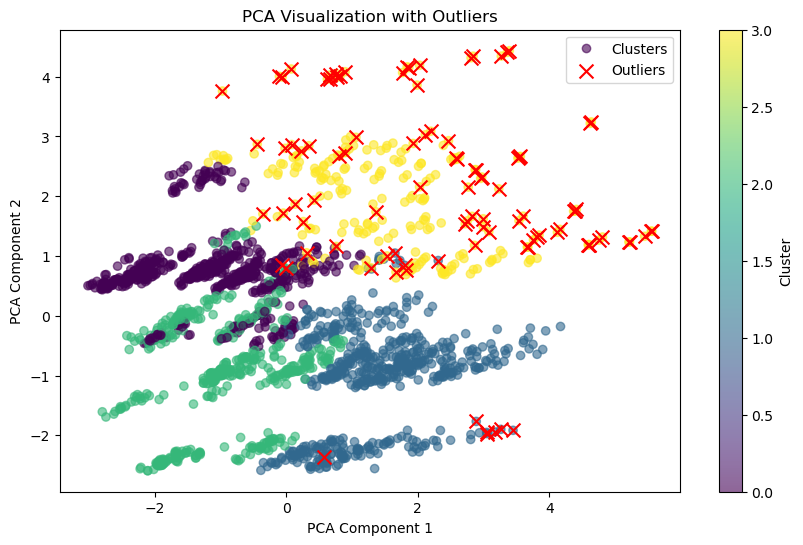

In [77]:
# Detect outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X_scaled)

# Add outlier information to the dataset
data['Is_Outlier'] = outliers
print(f"Number of outliers detected: {sum(outliers == -1)}")

# Analyze outliers
outlier_data = data[data['Is_Outlier'] == -1]
print("\nOutlier characteristics:")
print(outlier_data.describe())

# Visualize outliers in the context of clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
outlier_scatter = plt.scatter(X_pca[outliers == -1, 0], X_pca[outliers == -1, 1], 
                             c='red', marker='x', s=100, label='Outliers')
plt.legend(handles=[scatter.legend_elements()[0][0], outlier_scatter], 
           labels=['Clusters', 'Outliers'])
plt.title('PCA Visualization with Outliers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [78]:
# Save the results
data.to_csv('customer_segmentation_with_clusters.csv', index=False)
print("Results saved to 'customer_segmentation_with_clusters.csv'")

# Generate a comprehensive report
print("\n" + "="*60)
print("CUSTOMER SEGMENTATION ANALYSIS REPORT")
print("="*60)
print(f"Dataset Shape: {data.shape}")
print(f"Optimal Clusters: {optimal_clusters}")
print(f"Clustering Algorithm: KMeans (best performance)")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.3f}")

print("\nCluster Distribution:")
for i in range(optimal_clusters):
    cluster_size = sum(kmeans_labels == i)
    print(f"Cluster {i}: {cluster_size} customers ({cluster_size/len(data)*100:.1f}%)")

print("\nKey Insights:")
# Add your key insights based on the analysis
print("- Cluster 0: [Description based on your analysis]")
print("- Cluster 1: [Description based on your analysis]")
print("- Cluster 2: [Description based on your analysis]")
print("- Cluster 3: [Description based on your analysis]")

print("\nRecommendations:")
# Add marketing/business recommendations based on the segments
print("- Target Cluster X with [specific marketing strategy]")
print("- Develop personalized offers for Cluster Y focusing on [specific characteristics]")
print("- Consider [specific action] for outliers to understand their unique characteristics")

Results saved to 'customer_segmentation_with_clusters.csv'

CUSTOMER SEGMENTATION ANALYSIS REPORT
Dataset Shape: (2000, 10)
Optimal Clusters: 4
Clustering Algorithm: KMeans (best performance)
Silhouette Score: 0.269

Cluster Distribution:
Cluster 0: 705 customers (35.2%)
Cluster 1: 570 customers (28.5%)
Cluster 2: 462 customers (23.1%)
Cluster 3: 263 customers (13.2%)

Key Insights:
- Cluster 0: [Description based on your analysis]
- Cluster 1: [Description based on your analysis]
- Cluster 2: [Description based on your analysis]
- Cluster 3: [Description based on your analysis]

Recommendations:
- Target Cluster X with [specific marketing strategy]
- Develop personalized offers for Cluster Y focusing on [specific characteristics]
- Consider [specific action] for outliers to understand their unique characteristics
